# African Soil Property Prediction 

###### Predict physical and chemical properties of soil using spectral measurements


***
<img src="https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/preparing_soil_for_planting-thinkstock_0.jpg?itok=bnuhazgM" style="width:490px; float: left; margin: 0 0px 0px 0px;"></img>







In [1]:
# Project name used for jovian.commit
project_name = 'zerotogbms-course-project'

In [2]:
!pip install jovian opendatasets pandas --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project=project_name, privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dajo09/zerotogbms-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dajo09/zerotogbms-course-project


'https://jovian.ai/dajo09/zerotogbms-course-project'

In [5]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

### Download Data
- This dataset was downloaded from kaggle.com
- Dataset Info
    - PIDN: unique soil sample identifier
    - SOC: Soil organic carbon
    - pH: pH values
    - Ca: Mehlich-3 extractable Calcium
    - P: Mehlich-3 extractable Phosphorus
    - Sand: Sand content 
    - m7497.96 - m599.76: There are 3,578 mid-infrared absorbance measurements. For example, the "m7497.96" column is the absorbance at wavenumber 7497.96 cm-1. We suggest you to remove spectra CO2 bands which are in the region m2379.76 to m2352.76, but you do not have to.
    - Depth: Depth of the soil sample (2 categories: "Topsoil", "Subsoil")

In [6]:
dataset_url = 'https://www.kaggle.com/c/afsis-soil-properties/data'

In [7]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dajo09
Your Kaggle Key: ········


100%|██████████| 20.7M/20.7M [00:00<00:00, 33.8MB/s]


Extracting archive ./afsis-soil-properties/afsis-soil-properties.zip to ./afsis-soil-properties


In [8]:
path = './afsis-soil-properties'

sub = os.listdir(path)
print('\033[1m' + '\033[36m'+ '{}'.format(os.path.basename(path))+ '\033[0m','dataset has:  \n{} folders - "{}"'.format(len(sub),sub[:]))



afsis-soil-properties dataset has:  
3 folders - "['sample_submission.csv', 'test.zip', 'train.zip']"


In [9]:
sample_df = pd.read_csv(path + '/sample_submission.csv')
raw_test_df = pd.read_csv(path + '/test.zip')
raw_train_df = pd.read_csv(path + '/train.zip')
submission_df = pd.read_csv(path + '/sample_submission.csv')

In [10]:
print('\033[1m' + '\033[96m' + 'raw_train_df ' + '\033[0m' + 'contains \
{} rows and {} columns.'.format(raw_train_df.shape[0], raw_train_df.shape[1]))
print('\033[1m' + '\033[96m' + 'raw_test_df ' + '\033[0m' + 'contains \
{} rows and {} columns.'.format(raw_test_df.shape[0], raw_test_df.shape[1]))
target_columns = list(sample_df.columns[1:])
print('there"s a difference of 5 columns\n' )
print('\033[1m'+'\033[96m'+'Target Columns: '+'\033[0m'+'{}'.format(target_columns))

raw_train_df contains 1157 rows and 3600 columns.
raw_test_df contains 727 rows and 3595 columns.
there"s a difference of 5 columns

Target Columns: ['Ca', 'P', 'pH', 'SOC', 'Sand']


In [11]:
difference = raw_train_df.copy()
for i in difference:
    for j in raw_test_df:
        if i == j:
            difference.drop([i], axis = 'columns', inplace=True)
difference.head()

Ca         P        pH       SOC      Sand
0 -0.295749 -0.041336 -1.129366  0.353258  1.269748
1 -0.387442 -0.231552 -1.531538 -0.264023  1.692209
2 -0.248601 -0.224635 -0.259551  0.064152  2.091835
3 -0.332195 -0.318014 -0.577548 -0.318719  2.118477
4 -0.438350 -0.010210 -0.699135 -0.310905  2.164148

- ####  check for null values

In [12]:
print('null values','\n\033[1m' + '\033[96m' + 'raw_train_df: '+ '\033[0m'+ '{}'.format\
      (raw_train_df.isna().sum().max()), '\n\033[1m' + '\033[96m' + 'raw_test_df:  '+ '\033[0m'+ '{}'.format\
      (raw_test_df.isna().sum().max()))

null values 
raw_train_df: 0 
raw_test_df:  0


- since there are no null fields, there's no need for imputation and transformation
- the numerical columns of both dataframes are then acquired

In [13]:
numeric_cols_train = raw_train_df.select_dtypes(include=['float64']).columns.tolist()
numeric_cols_test = raw_test_df.select_dtypes(include=['float64']).columns.tolist()

### Scale Numerical Values using sklearn

In [14]:
raw_train_df[numeric_cols_train].describe().loc[['min', 'max']]

m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  m7486.39  \
min -0.042260 -0.048559 -0.055518 -0.052353 -0.040608 -0.034516 -0.042619   
max  0.730793  0.725493  0.720711  0.723293  0.731205  0.733872  0.726075   

     m7484.46  m7482.54  m7480.61  m7478.68  m7476.75  m7474.82  m7472.89  \
min -0.053856 -0.057699 -0.058482 -0.058516 -0.055382 -0.050047 -0.044445   
max  0.717652  0.716443  0.716307  0.715540  0.718900  0.725116  0.731466   

     m7470.97  m7469.04  m7467.11  m7465.18  m7463.25  m7461.32  m7459.39  \
min -0.040496 -0.041609 -0.046195 -0.047614 -0.048243 -0.053698 -0.059410   
max  0.735929  0.734779  0.729934  0.727856  0.726349  0.720007  0.712521   

     m7457.47  m7455.54  m7453.61  m7451.68  m7449.75  m7447.82  m7445.89  \
min -0.060471 -0.057686 -0.053916 -0.052795 -0.054845 -0.056737 -0.055440   
max  0.710120  0.714294  0.720478  0.722384  0.719997  0.718446  0.721279   

     m7443.97  m7442.04  m7440.11  m7438.18  m7436.25  m7434.32   m7432.4  \
min -0.054183 -0.057408  -0.06105 -0.061714 -0.063246 -0.066335 -0.067661   
max  0.722782  0.717108   0.71194  0.711861  0.709282  0.703568  0.701358   

     m7430.47  m7428.54  m7426.61  m7424.68  m7422.75  m7420.82   m7418.9  \
min -0.066865 -0.064690 -0.058404 -0.049749 -0.047555 -0.050864 -0.052722   
max  0.703629  0.708326  0.717285  0.728495  0.732891  0.730087  0.726005   

     m7416.97  m7415.04  m7413.11  m7411.18  m7409.25  m7407.33   m7405.4  \
min -0.056044 -0.062002 -0.065272 -0.065482 -0.065294 -0.064206 -0.059914   
max  0.719233  0.710947  0.707277  0.706633  0.705244  0.706240  0.712835   

     m7403.47  m7401.54  m7399.61  m7397.68  m7395.75  m7393.83   m7391.9  \
min -0.055575 -0.056917 -0.061678 -0.064470 -0.064828 -0.064310 -0.064056   
max  0.718449  0.715655  0.708813  0.704947  0.704753  0.706067  0.706596   

     m7389.97  m7388.04  m7386.11  m7384.18  m7382.25  m7380.33   m7378.4  \
min -0.064368 -0.064188 -0.061945 -0.056148 -0.050464 -0.049361 -0.047718   
max  0.706237  0.707161  0.711336  0.720395  0.729530  0.731437  0.731377   

     m7376.47  m7374.54  m7372.61  m7370.68  m7368.76  m7366.83   m7364.9  \
min -0.045418 -0.050715 -0.059391 -0.062753 -0.063070 -0.063967 -0.064684   
max  0.732125  0.724226  0.711884  0.707302  0.706652  0.703517  0.701219   

     m7362.97  m7361.04  m7359.11  m7357.18  m7355.26  m7353.33   m7351.4  \
min -0.063816 -0.060718 -0.057103 -0.055896 -0.054468 -0.047016 -0.037523   
max  0.703656  0.710198  0.716759  0.719773  0.722150  0.729453  0.739295   

     m7349.47  m7347.54  m7345.61  m7343.68  m7341.76  m7339.83   m7337.9  \
min -0.036899 -0.046769 -0.055789 -0.054027 -0.046471 -0.044007 -0.047442   
max  0.741677  0.731026  0.718735  0.720285  0.730543  0.734199  0.728181   

     m7335.97  m7334.04  m7332.11  m7330.19  m7328.26  m7326.33   m7324.4  \
min -0.052432 -0.057625 -0.060759 -0.061470 -0.062250 -0.063077 -0.062696   
max  0.719449  0.711960  0.707905  0.706389  0.703043  0.698458  0.697458   

     m7322.47  m7320.54  m7318.61  m7316.69  m7314.76  m7312.83   m7310.9  \
min -0.061500 -0.060209 -0.059207 -0.058035 -0.053726 -0.047990 -0.048417   
max  0.700104  0.704013  0.707349  0.710436  0.717854  0.726661  0.725010   

     m7308.97  m7307.04  m7305.12  m7303.19  m7301.26  m7299.33   m7297.4  \
min -0.054144 -0.057551 -0.054981 -0.046826 -0.038353 -0.035065 -0.035811   
max  0.715003  0.709770  0.714576  0.727717  0.741085  0.745981  0.744561   

     m7295.47  m7293.54  m7291.62  m7289.69  m7287.76  m7285.83   m7283.9  \
min -0.037026 -0.040060 -0.046535 -0.052312 -0.054262 -0.053646 -0.052598   
max  0.743730  0.739578  0.728644  0.718951  0.715527  0.716920  0.719015   

     m7281.97  m7280.04  m7278.12  m7276.19  m7274.26  m7272.33   m7270.4  \
min -0.052489 -0.052601 -0.051753 -0.050615 -0.050579 -0.050951 -0.049250   
max  0.718170  0.716223  0.716877  0.719184  0.719398  0.718104  0.720721   

     m7268.47  m7266.55  m7264.62  m7262.69  m7260.76  m7258.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler_train.fit(raw_train_df[numeric_cols_train])
scaler_test.fit(raw_test_df[numeric_cols_test])

MinMaxScaler()

In [16]:
print('Minimum:', list(scaler_train.data_min_)[:5])
print('Maximum:', list(scaler_train.data_max_)[:5])


Minimum: [-0.0422603, -0.0485588, -0.0555176, -0.052353, -0.040608]
Maximum: [0.730793, 0.725493, 0.720711, 0.723293, 0.731205]


In [17]:
# Transform and replace the numeric columns
raw_train_df[numeric_cols_train] = scaler_train.transform(raw_train_df[numeric_cols_train])
raw_test_df[numeric_cols_test] = scaler_test.transform(raw_test_df[numeric_cols_test])

#### After scaling, the ranges of all numeric columns should be (0,1)


In [18]:
raw_train_df[numeric_cols_train].describe().loc[['min', 'max']]

m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  m7486.39  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7484.46  m7482.54  m7480.61  m7478.68  m7476.75  m7474.82  m7472.89  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7470.97  m7469.04  m7467.11  m7465.18  m7463.25  m7461.32  m7459.39  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7457.47  m7455.54  m7453.61  m7451.68  m7449.75  m7447.82  m7445.89  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7443.97  m7442.04  m7440.11  m7438.18  m7436.25  m7434.32  m7432.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7430.47  m7428.54  m7426.61  m7424.68  m7422.75  m7420.82  m7418.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7416.97  m7415.04  m7413.11  m7411.18  m7409.25  m7407.33  m7405.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7403.47  m7401.54  m7399.61  m7397.68  m7395.75  m7393.83  m7391.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7389.97  m7388.04  m7386.11  m7384.18  m7382.25  m7380.33  m7378.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7376.47  m7374.54  m7372.61  m7370.68  m7368.76  m7366.83  m7364.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7362.97  m7361.04  m7359.11  m7357.18  m7355.26  m7353.33  m7351.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7349.47  m7347.54  m7345.61  m7343.68  m7341.76  m7339.83  m7337.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7335.97  m7334.04  m7332.11  m7330.19  m7328.26  m7326.33  m7324.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7322.47  m7320.54  m7318.61  m7316.69  m7314.76  m7312.83  m7310.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7308.97  m7307.04  m7305.12  m7303.19  m7301.26  m7299.33  m7297.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7295.47  m7293.54  m7291.62  m7289.69  m7287.76  m7285.83  m7283.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7281.97  m7280.04  m7278.12  m7276.19  m7274.26  m7272.33  m7270.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7268.47  m7266.55  m7264.62  m7262.69  m7260.76  m7258.83  m7256.9  \
min       0.0       0.0 

In [19]:
raw_test_df[numeric_cols_test].describe().loc[['min', 'max']]

m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  m7486.39  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7484.46  m7482.54  m7480.61  m7478.68  m7476.75  m7474.82  m7472.89  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7470.97  m7469.04  m7467.11  m7465.18  m7463.25  m7461.32  m7459.39  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7457.47  m7455.54  m7453.61  m7451.68  m7449.75  m7447.82  m7445.89  \
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

     m7443.97  m7442.04  m7440.11  m7438.18  m7436.25  m7434.32  m7432.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7430.47  m7428.54  m7426.61  m7424.68  m7422.75  m7420.82  m7418.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7416.97  m7415.04  m7413.11  m7411.18  m7409.25  m7407.33  m7405.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7403.47  m7401.54  m7399.61  m7397.68  m7395.75  m7393.83  m7391.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7389.97  m7388.04  m7386.11  m7384.18  m7382.25  m7380.33  m7378.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7376.47  m7374.54  m7372.61  m7370.68  m7368.76  m7366.83  m7364.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7362.97  m7361.04  m7359.11  m7357.18  m7355.26  m7353.33  m7351.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7349.47  m7347.54  m7345.61  m7343.68  m7341.76  m7339.83  m7337.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7335.97  m7334.04  m7332.11  m7330.19  m7328.26  m7326.33  m7324.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7322.47  m7320.54  m7318.61  m7316.69  m7314.76  m7312.83  m7310.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7308.97  m7307.04  m7305.12  m7303.19  m7301.26  m7299.33  m7297.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7295.47  m7293.54  m7291.62  m7289.69  m7287.76  m7285.83  m7283.9  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7281.97  m7280.04  m7278.12  m7276.19  m7274.26  m7272.33  m7270.4  \
min       0.0       0.0       0.0       0.0       0.0       0.0      0.0   
max       1.0       1.0       1.0       1.0       1.0       1.0      1.0   

     m7268.47  m7266.55  m7264.62  m7262.69  m7260.76  m7258.83  m7256.9  \
min       0.0       0.0 

### Convert Categorical Columns to Numeric

In [20]:
categorical_cols = raw_train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['PIDN', 'Depth']

- both dataframes have the categorical columns: ['PIDN', 'Depth']
#### append a new column to both dataframes for the converted codes 

In [21]:
soil_depth = {'Topsoil' : 0 , 'Subsoil' : 1}
raw_train_df['depth_code'] = raw_train_df.Depth.map(soil_depth)
raw_test_df['depth_code'] = raw_test_df.Depth.map(soil_depth)

#### check if 'Depth' and 'depth_code' have same value_counts for the raw train and test datasets

In [22]:
(raw_train_df.Depth.value_counts()[0] == raw_train_df.depth_code.value_counts()[0]) & \
(raw_train_df.Depth.value_counts()[1] == raw_train_df.depth_code.value_counts()[1])

True

In [23]:
(raw_test_df.Depth.value_counts()[0] == raw_test_df.depth_code.value_counts()[0]) & \
(raw_test_df.Depth.value_counts()[1] == raw_test_df.depth_code.value_counts()[1]) 

True

### Exploratory Analysis and Visualization

In [24]:
!pip install plotly matplotlib seaborn numpy --quiet

In [25]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#A4DBE8'

In [27]:
visual_df = raw_train_df[['Ca', 'P', 'pH', 'SOC', 'Sand', 'Depth']]

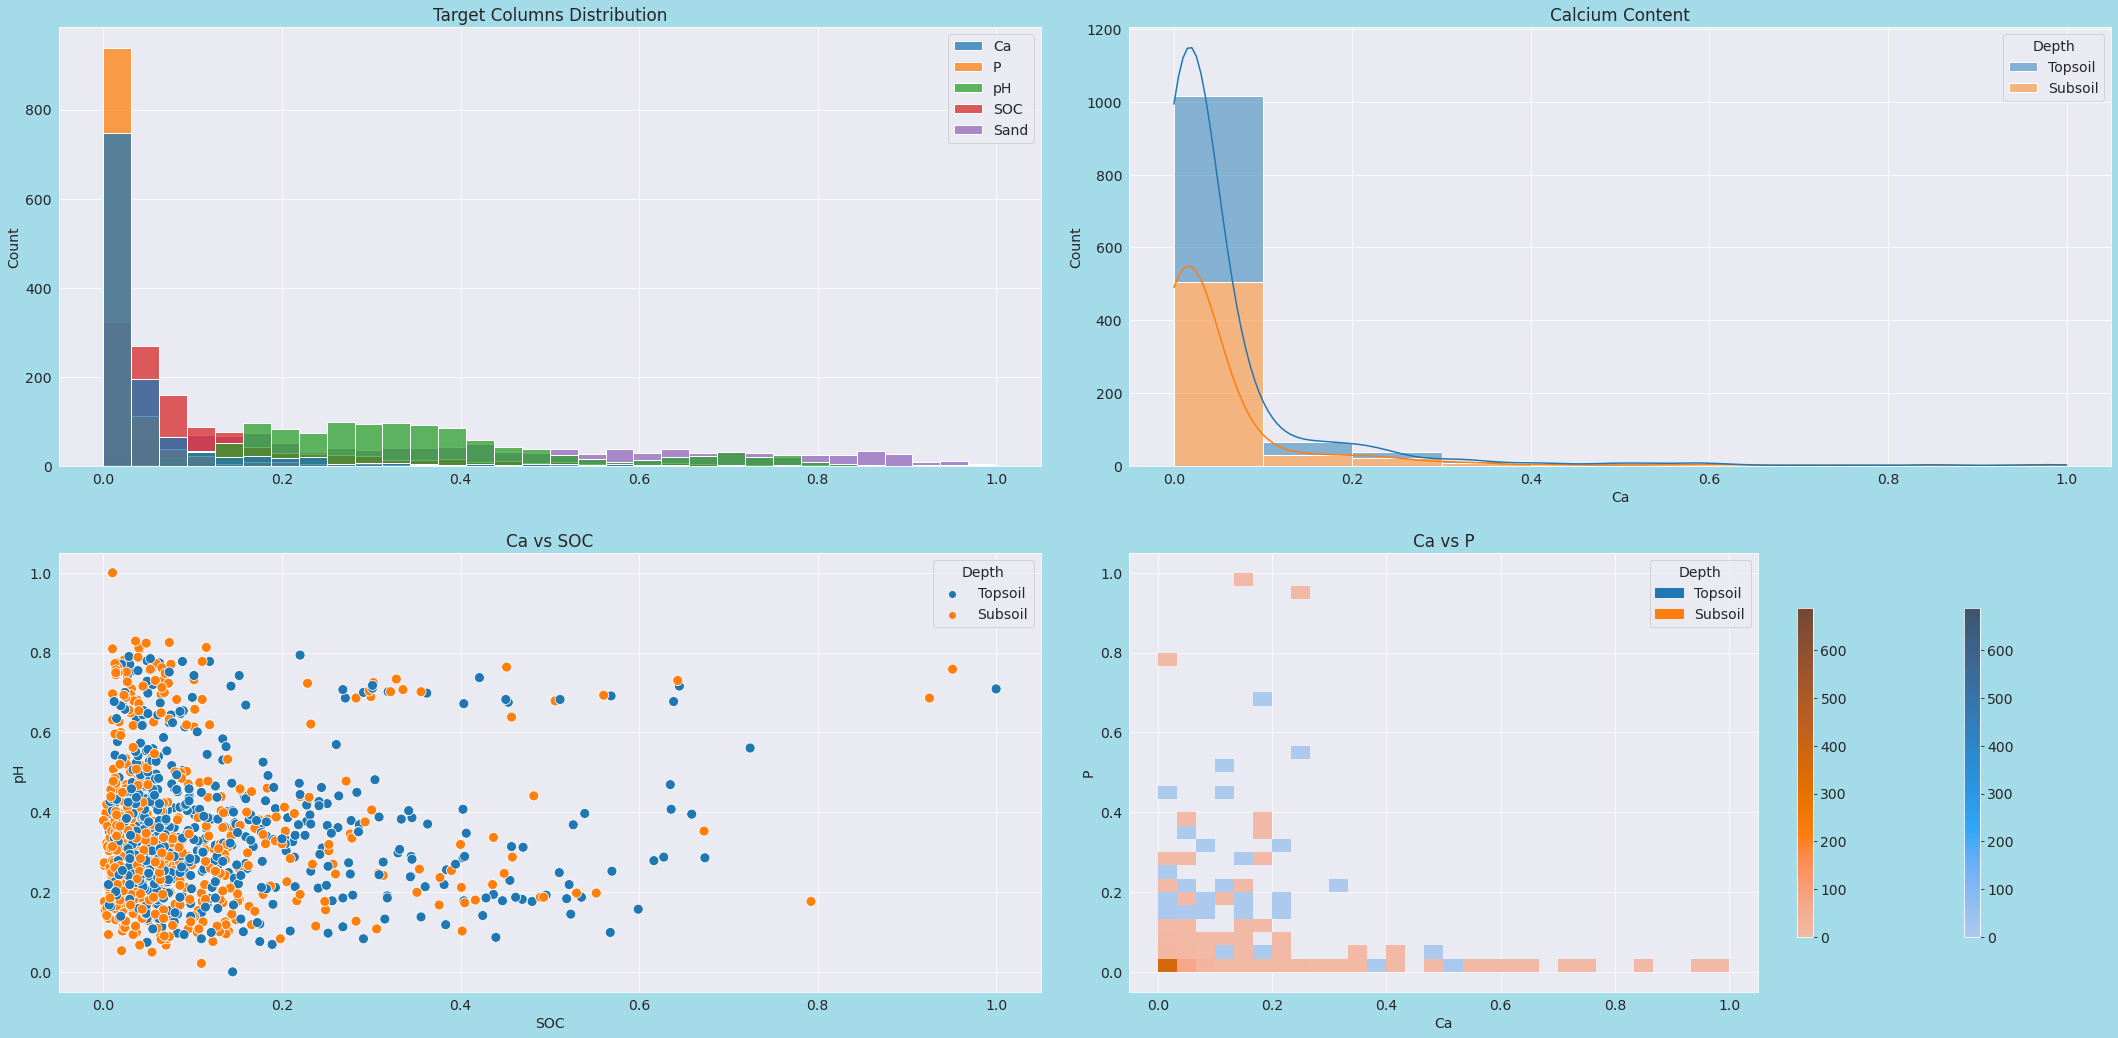

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (30, 15))

axes[0,0].set_title('Target Columns Distribution')
sns.histplot(data = visual_df,
                ax = axes[0,0]);

axes[0,1].set_title('Calcium Content')
sns.histplot(data = visual_df, 
                x = 'Ca',
                hue = 'Depth',
                bins = 10,
                kde = True,
                multiple = 'stack',               
                ax = axes[0,1]);


axes[1,0].set_title('Ca vs SOC')
sns.scatterplot(x = visual_df.SOC, 
                y = visual_df.pH, 
                hue = visual_df.Depth, 
                s = 100, 
                ax=axes[1,0]);

axes[1,1].set_title('Ca vs P')
sns.histplot(data = visual_df, 
             x="Ca", 
             y="P",
             hue = 'Depth',
             bins = 30,
             cbar=True, 
             cbar_kws=dict(shrink=.75),
             ax = axes[1,1]);


plt.tight_layout(pad = 2);

drop 'PIDN' and other non_numeric columns from both dataframes and drop the target columns from raw_train_df which leaves the remaining columns for training and validation

In [29]:
#drop 'PIDN', 'Depth' on both datasets
train_df = raw_train_df.drop([*target_columns,'PIDN', 'Depth'], axis = 'columns')
test_df = raw_test_df.drop(['PIDN', 'Depth'], axis = 'columns')

In [30]:
# check to make sure train and test datasets are of equal number of columns
len(train_df.columns) == len(test_df.columns)

True

### Get base accuracy scores

In [31]:
target_columns

['Ca', 'P', 'pH', 'SOC', 'Sand']

In [32]:
#create dataframe to log rmse and score values
rmse_score_df = pd.DataFrame(columns = target_columns, index =
                             ['train_rmse', 'val_rmse', 'base_train_score', 'base_val_score','train_score', 'val_score', 'difference'])
rmse_score_df

Ca    P   pH  SOC Sand
train_rmse        NaN  NaN  NaN  NaN  NaN
val_rmse          NaN  NaN  NaN  NaN  NaN
base_train_score  NaN  NaN  NaN  NaN  NaN
base_val_score    NaN  NaN  NaN  NaN  NaN
train_score       NaN  NaN  NaN  NaN  NaN
val_score         NaN  NaN  NaN  NaN  NaN
difference        NaN  NaN  NaN  NaN  NaN

***
## Model 1

### Decision Tree Regressor Model

In [33]:
!pip install scikit-learn --upgrade --quiet

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [35]:
?DecisionTreeRegressor

As a general rule of thumb around 60% of the data can be used for the training set, 20% for the validation set and 20% for the test set. 

`If a separate test set is already provided, a 75%-25% training-validation split can be used.`

train_test_split utility from scikit-learn is used when rows in the dataset have no inherent order; pick random subsets of rows for creating test and validation sets

### Run and plot hyperparameter value of a single target
- to check for perfect fit

In [94]:
from IPython.display import Audio, display

def sound_off():   
  display(Audio(url='https://www.pacdv.com/sounds/interface_sound_effects/beep-7.wav', autoplay=True))

In [87]:
def single_target(model, target, **params):
    #create inputs and targets for each target in the target columns
    
    train_inputs, val_inputs, train_targets, val_targets \
    = train_test_split(train_df, raw_train_df[target], test_size=0.25, random_state = 42)

    #Create the model and fit inputs and targets
    mod = model(**params).fit(train_inputs, train_targets)

    #base score values
    base_train_score = mod.score(train_inputs, train_targets)
    base_val_score = mod.score(val_inputs, val_targets)
    rmse_score_df.at['base_train_score', t_col]= base_train_score
    rmse_score_df.at['base_val_score', t_col]= base_val_score

    #train predictions and evaluate model using RMSE
    train_rmse = mean_squared_error(train_targets, mod.predict(train_inputs), squared=False)
    val_rmse = mean_squared_error(val_targets, mod.predict(val_inputs), squared =False)
    train_score = mod.score(train_inputs,train_targets)
    val_score = mod.score(val_inputs,val_targets)
    
    return train_rmse, val_rmse, train_score, val_score

In [88]:
def plot_param_values(p_name, p_values, init_params):
    train_errors, val_errors, train_scores, val_scores = [], [], [], []

    for val in p_values:
        params = {p_name: val}
        params.update(init_params)
        train_rmse, val_rmse, train_score, val_score = single_target(model, target, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        train_scores.append(train_score)
        val_scores.append(val_score)  
    
    plt.figure()
    plt.figure(figsize=(10,5))
    plt.title('RMSE Overfitting curve: ' + p_name + '\n' + t_col)
    plt.plot(p_values, train_errors, 'b-o')
    plt.plot(p_values, val_errors, 'ro-')

    plt.xlabel(p_name)
    plt.ylabel('RMSE')
    plt.legend(['training', 'validation']);
    sound_off()

**Decision Tree Regressor Model Parameters:**
- criterion, {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
- max_depth, def=None
- min_samples_split, int or float, def=2; min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]
- min_samples_leaf, int or float, def=1; min_samples_leaf must be at least 1 or in (0, 0.5]
- min_weight_fraction_leaf, float, def= 0.0; min_weight_fraction_leaf must in [0, 0.5]
- max_features, int, float or {“auto”, “sqrt”, “log2”}, default=None; max_features must be in (0, n_features]
- max_leaf_nodes, int, default=None; max_leaf_nodes 1 must be either None or larger than 1
- min_impurity_decrease, float, default=0.0
- ccp_alpha, non-negative float, default=0.0

[sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree%20regressor#sklearn.tree.DecisionTreeRegressor)

[sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean%20squared%20error#sklearn.metrics.mean_squared_error)
- RETURNS - loss, float or ndarray of floats
A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
- squared,bool, default=True
If True returns MSE value, if False returns RMSE value.

score
- The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

### Get the average fit for all targets

In [38]:
#DecisionTreeRegressor(random_state=42)
model = DecisionTreeRegressor
init_params = {'random_state' : 42}

In [39]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'cost_complexity_pruning_path',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'predict',
 'score',
 'set_params']

<Figure size 432x288 with 0 Axes>

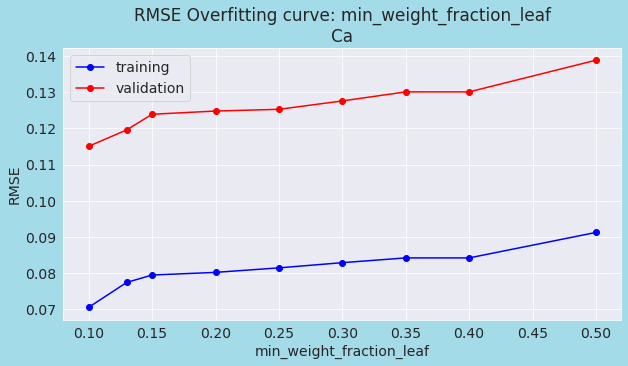

<Figure size 432x288 with 0 Axes>

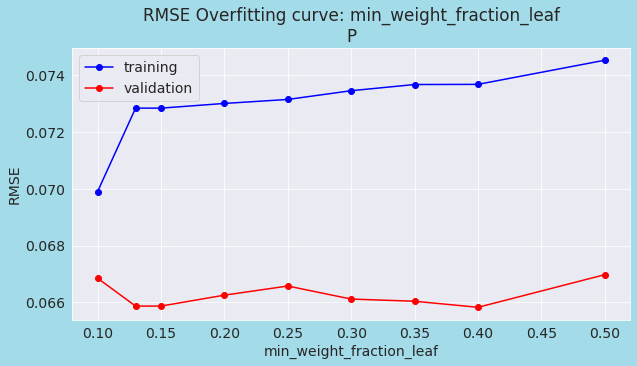

<Figure size 432x288 with 0 Axes>

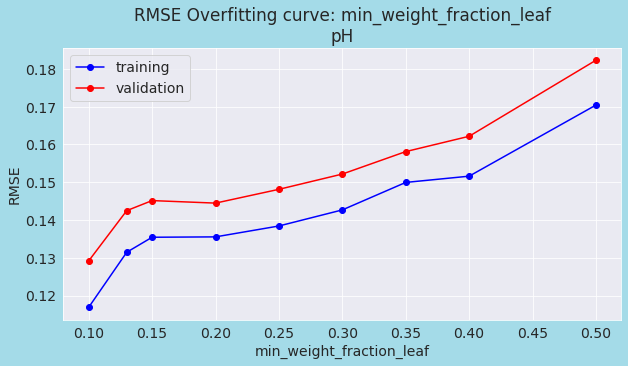

<Figure size 432x288 with 0 Axes>

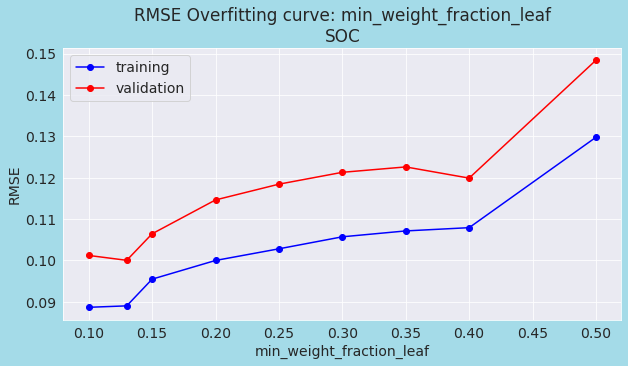

<Figure size 432x288 with 0 Axes>

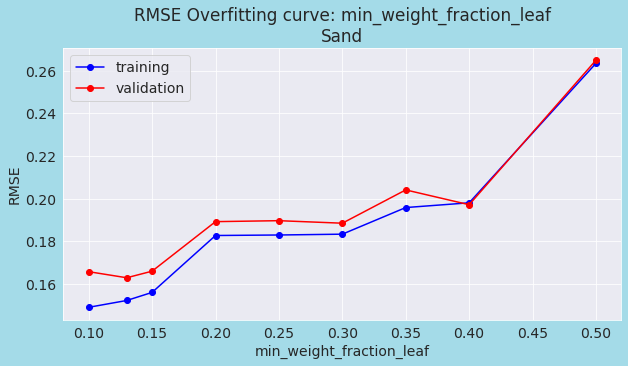

In [40]:
for t_col in target_columns:
    target = t_col
    plot_param_values('min_weight_fraction_leaf', [0.1, 0.13, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5], init_params)

- determine the average good fit for all targets
- log hyperparameter values and result using as metrics
- run for all hyperparameters


In [41]:
from numpy import mean

In [42]:
param_fit = np.mean([0.20, 0.20, 0.20, 0.20, 0.25])
param_fit

0.21000000000000002

In [43]:
jovian.log_metrics({'model1' : 'DecisionTreeRegressor', 
                    'random_state' : 42,
                    'max_depth' : {18 : [5,10,15,20,25,30,35]},
                    'min_samples_split' : {0.44 : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
                    'min_samples_leaf' : {0.20 : [0.1, 0.13, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]},
                    'min_weight_fraction_leaf' : {0.21 : [0.1, 0.13, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]},
                    'max_leaf_nodes' : {10 : [5,6,7,8,9, 10, 11, 12, 15]},
                    'max_features' : {'sqrt' : ['auto', 'sqrt', 'log2', 1, 2]}
                   })

[jovian] Metrics logged.


***
### Run the model with the tuned hyperparameters or better

In [44]:
pd.set_option('display.max_colwidth', None)

In [45]:
#create df for param results
param_results_df = pd.DataFrame(columns = ['model_name', 'avg_train_score', 'avg_val_score', 'avg_difference', 'sum_of_differences', 'params'])

In [89]:
def run_model(model, init_params, **params): 
    params.update(init_params)
   
    for t_col in target_columns:
        #create inputs and targets for each target in the target columns
        train_inputs, val_inputs, train_targets, val_targets \
        = train_test_split(train_df, raw_train_df[t_col], test_size=0.25, random_state=42)

        #Create the model and fit inputs and targets
        mod = model(**params).fit(train_inputs, train_targets)
        
        #train predictions and evaluate model using RMSE
        train_rmse = mean_squared_error(train_targets, mod.predict(train_inputs), squared=False)
        val_rmse = mean_squared_error(val_targets, mod.predict(val_inputs), squared =False)
        rmse_score_df.at['train_rmse', t_col]= train_rmse
        rmse_score_df.at['val_rmse', t_col]= val_rmse
        
        train_score = mod.score(train_inputs,train_targets)
        val_score = mod.score(val_inputs,val_targets)
        rmse_score_df.at['train_score', t_col]= train_score
        rmse_score_df.at['val_score', t_col]= val_score
        rmse_score_df.at['difference', t_col]= abs(train_score - val_score)

        #print values
        print('\033[1m'+ 'Target Column: ' + '\033[96m' + t_col + '\033[0m' + '\nTrain RMSE: {}, \nValidation RMSE: {}, \nTrain Score: {}, \nValidation Score: {}\n'\
          .format(train_rmse, val_rmse, train_score, val_score))
        
        #make predictions
        submission_df[t_col] = mod.predict(test_df)
    
    #calculate mean of row values
    rmse_score_df['mean'] = rmse_score_df.mean(axis=1)
    
    model_name = type(mod).__name__
    print('\033[1m' + 'Model: ' + '\033[36m' + model_name + '\033[0m')
    print('\033[1m' + 'Parameter(s):  ' + '\033[0m' + f'{params}\n')
    print(rmse_score_df.iloc[4:], '\n')
    
    if rmse_score_df.iloc[-3, -1] >= 0.90:
        #print difference
        print(rmse_score_df.loc['difference'].sum(), '\n')
        
        param_results_df.loc[len(param_results_df.index)] = [model_name, rmse_score_df.iloc[-3, -1], rmse_score_df.iloc[-2, -1],
                                            rmse_score_df.iloc[-1, -1], rmse_score_df.loc['difference'].sum(), params]
        #plot figure
        plt.figure(figsize=(10,6))
        plt.title(model_name+' Model')
        sns.barplot(data = rmse_score_df);
    else:
        print('\033[1m' + '\033[95m' +'Accuracy below 90%, tweak parameter(s)\n'+ '\033[0m')
    
    sound_off()

In [47]:
%%time
run_model(model, init_params, max_depth =18, min_samples_split = 0.44)

Target Column: Ca
Train RMSE: 0.06407533287111834, 
Validation RMSE: 0.10207202329740772, 
Train Score: 0.5060918357726514, 
Validation Score: 0.450444621528035

Target Column: P
Train RMSE: 0.0695405628430587, 
Validation RMSE: 0.06350586594921047, 
Train Score: 0.12944068210934734, 
Validation Score: 0.10021663210415355

Target Column: pH
Train RMSE: 0.11946146324837197, 
Validation RMSE: 0.1374165156795743, 
Train Score: 0.508660595899424, 
Validation Score: 0.42934313929009016

Target Column: SOC
Train RMSE: 0.09391966022257071, 
Validation RMSE: 0.10332267762305493, 
Train Score: 0.47614771757917107, 
Validation Score: 0.5124806417243015

Target Column: Sand
Train RMSE: 0.18268067754446637, 
Validation RMSE: 0.18919558978637138, 
Train Score: 0.5195764474187634, 
Validation Score: 0.48484717243476394

Model: DecisionTreeRegressor
Parameter(s):  {'max_depth': 18, 'min_samples_split': 0.44, 'random_state': 42}

                   Ca         P        pH       SOC      Sand      mean


In [48]:
%%time
run_model(model, init_params, max_depth =18, min_samples_split = 0.40, max_leaf_nodes = 10, min_samples_leaf = 20)

Target Column: Ca
Train RMSE: 0.06401401520320642, 
Validation RMSE: 0.10201665004225557, 
Train Score: 0.5070366862945423, 
Validation Score: 0.4510407185781794

Target Column: P
Train RMSE: 0.07099214206706081, 
Validation RMSE: 0.06345172246771641, 
Train Score: 0.09271751621772473, 
Validation Score: 0.10175024276491362

Target Column: pH
Train RMSE: 0.11946146324837197, 
Validation RMSE: 0.1374165156795743, 
Train Score: 0.508660595899424, 
Validation Score: 0.42934313929009016

Target Column: SOC
Train RMSE: 0.09373677256198201, 
Validation RMSE: 0.10323965141733873, 
Train Score: 0.47818590293120233, 
Validation Score: 0.5132638312546883

Target Column: Sand
Train RMSE: 0.17357094265488762, 
Validation RMSE: 0.18221181778694154, 
Train Score: 0.5662963199841627, 
Validation Score: 0.5221768883084859

Model: DecisionTreeRegressor
Parameter(s):  {'max_depth': 18, 'min_samples_split': 0.4, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'random_state': 42}

                   Ca     

### Predictions for DecisionTreeRegressor

In [49]:
submission_df

PIDN        Ca         P        pH       SOC      Sand
0    09gt9UK5  0.045396  0.010555  0.296587  0.023072  0.599819
1    0BVvxJ6a  0.045396  0.090717  0.380620  0.085057  0.151165
2    0KbdgApg  0.273084  0.060858  0.380620  0.085057  0.304512
3    0MnuuduB  0.273084  0.090717  0.380620  0.307826  0.151165
4    0PcIsF9z  0.045396  0.028691  0.229761  0.134259  0.633490
5    0ShTFLYJ  0.017010  0.010555  0.484159  0.041081  0.633490
6    0XZh9jka  0.273084  0.024958  0.229761  0.307826  0.151165
7    0Y7Wegri  0.029083  0.060858  0.380620  0.085057  0.304512
8    0dTqplIM  0.151949  0.010555  0.380620  0.134259  0.304512
9    0lNiZicC  0.017010  0.010555  0.484159  0.023072  0.304512
10   0rGeJ0QN  0.029083  0.028691  0.229761  0.085057  0.633490
11   0sXI9ytQ  0.008394  0.010555  0.296587  0.041081  0.633490
12   0ukt4aP6  0.151949  0.010555  0.484159  0.085057  0.151165
13   1AGspb8f  0.045396  0.060858  0.229761  0.134259  0.304512
14   1Csy0gvE  0.008394  0.010555  0.296587  0.041081  0.633490
15   1Ic2hly1  0.045396  0.024958  0.380620  0.085057  0.633490
16   1PPbaTwt  0.045396  0.010555  0.296587  0.023072  0.304512
17   1SO5VJNy  0.045396  0.028691  0.296587  0.041081  0.633490
18   1arHxK3Y  0.151949  0.010555  0.484159  0.134259  0.304512
19   1fCW4Bba  0.029083  0.010555  0.380620  0.085057  0.304512
20   1qDZNvIm  0.029083  0.024958  0.380620  0.023072  0.633490
21   28LYJC2V  0.045396  0.060858  0.229761  0.134259  0.304512
22   2CzACvQq  0.045396  0.090717  0.380620  0.307826  0.151165
23   2FT3crfv  0.151949  0.010555  0.380620  0.134259  0.304512
24   2Fy2uHVg  0.029083  0.090717  0.380620  0.085057  0.633490
25   2MkMEApm  0.045396  0.010555  0.380620  0.085057  0.633490
26   2NDGWEOe  0.151949  0.056309  0.484159  0.085057  0.151165
27   2NyyCiqn  0.045396  0.010555  0.296587  0.041081  0.633490
28   2QRzIb84  0.045396  0.090717  0.484159  0.085057  0.304512
29   2QcbdrUZ  0.029083  0.090717  0.380620  0.085057  0.633490
30   2YgAimWK  0.029083  0.010555  0.380620  0.085057  0.633490
31   2cx85d9H  0.029083  0.060858  0.380620  0.085057  0.304512
32   2homMXMV  0.045396  0.024958  0.229761  0.041081  0.633490
33   2ldLrUtq  0.045396  0.010555  0.484159  0.134259  0.304512
34   2nsACW6G  0.029083  0.024958  0.229761  0.307826  0.151165
35   2yMbVnWc  0.029083  0.024958  0.380620  0.134259  0.633490
36   36r8sgGQ  0.008394  0.028691  0.296587  0.023072  0.633490
37   3NXAXCl3  0.045396  0.024958  0.229761  0.134259  0.151165
38   3QG0z6fl  0.029083  0.010555  0.380620  0.085057  0.304512
39   3WS8R9qm  0.273084  0.024958  0.229761  0.307826  0.151165
40   3fRLm8f5  0.045396  0.024958  0.229761  0.134259  0.633490
41   3mZhp1nQ  0.029083  0.090717  0.380620  0.085057  0.633490
42   3pikJXRL  0.029083  0.024958  0.229761  0.134259  0.151165
43   3pxOEGHL  0.045396  0.028691  0.296587  0.023072  0.633490
44   3ttdV3f5  0.273084  0.090717  0.380620  0.085057  0.633490
45   3v4X6Mfe  0.151949  0.010555  0.649800  0.134259  0.304512
46   3wORuPiv  0.151949  0.024958  0.380620  0.134259  0.151165
47   43EfrxZj  0.045396  0.010555  0.380620  0.134259  0.304512
48   457Vwm21  0.029083  0.090717  0.380620  0.085057  0.304512
49   46KNnOdx  0.008394  0.024958  0.229761  0.134259  0.633490
50   47TwNsVC  0.045396  0.024958  0.229761  0.307826  0.151165
51   49856RpO  0.045396  0.024958  0.229761  0.307826  0.304512
52   4Ane1o2N  0.045396  0.010555  0.484159  0.041081  0.633490
53   4AyVUgSc  0.029083  0.010555  0.484159  0.085057  0.633490
54   4B1951On  0.045396  0.010555  0.484159  0.134259  0.151165
55   4OL39Teo  0.045396  0.010555  0.380620  0.134259  0.304512
56   4eQ90eLY  0.045396  0.060858  0.380620  0.307826  0.304512
57   4o5jwMj8  0.045396  0.010555  0.296587  0.023072  0.633490
58   4vPgpl2c  0.045396  0.060858  0.380620  0.023072  0.599819
59   51r9aA0d  0.029083  0.010555  0.484159  0.085057  0.633490
60   58SmeRoP  0.273084  0.028691  0.380620  0.134259  0.304512
61   5HJp1AXn  0.151949  0.024958  0.2965

### kaggle submission

In [50]:
sample_df.head()

PIDN  Ca  P  pH  SOC  Sand
0  09gt9UK5   0  0   0    0     0
1  0BVvxJ6a   0  0   0    0     0
2  0KbdgApg   0  0   0    0     0
3  0MnuuduB   0  0   0    0     0
4  0PcIsF9z   0  0   0    0     0

In [51]:
submission_df.to_csv('submission.csv', index=False)

In [52]:
from IPython.display import FileLink
FileLink('submission.csv')

/home/jovyan/submission.csv

Submission link : https://www.kaggle.com/c/afsis-soil-properties/submit
## Model: DecisionTreeRegressor

### 8th overall submission 
- Parameter(s):  {'max_depth': 18, 'min_samples_split': 0.4, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'random_state': 42}

![](https://i.imgur.com/Lx6pgs9.png)

***
4th 
- Score - 1.00890
- Parameter(s):  {'max_depth': 18, 'min_samples_split': 0.44, 'random_state': 42}

5th:
- Score - 1.01159
- Parameter(s):  {'max_depth': 18, 'min_samples_split': 0.44, 'min_weight_fraction_leaf': 0.26, 'random_state': 42}

6th:
- Score - 1.00890
- Parameter(s):  {'max_depth': 18, 'min_samples_split': 0.44, 'max_leaf_nodes': 10, 'random_state': 42}

7th:
- Score - 1.01666
- Model: DecisionTreeRegressor
Parameter(s):  {'min_samples_split': 0.7, 'random_state': 42}





***
### Check Feature Importance

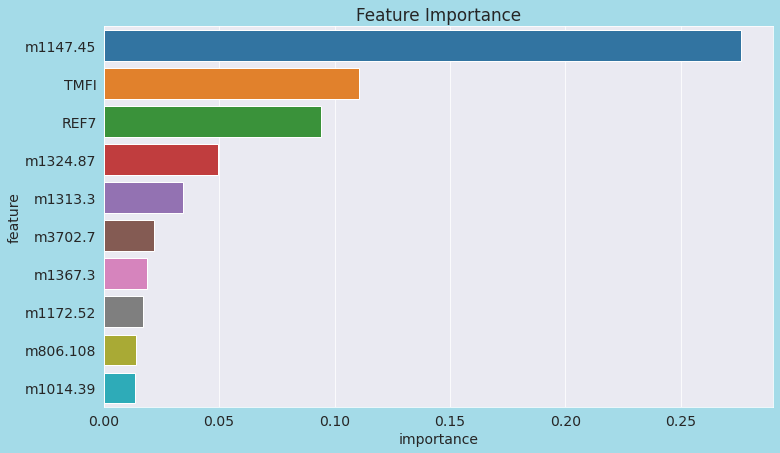

In [53]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_df, raw_train_df[target_columns], test_size=0.25, random_state=42)

#Create the model and fit inputs and targets
model = DecisionTreeRegressor(random_state = 42).fit(train_inputs, train_targets)
model_importance = model.feature_importances_

model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_importance
}).sort_values('importance', ascending= False)

plt.figure(figsize=(12,7))
plt.title('Feature Importance')
sns.barplot(data = model_importance_df.head(10), x = 'importance', y = 'feature');

***
## Model 2
### Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

**Random Forest Regressor Model Parameters:**
- n_estimators, int, default=100
- criterion{“mse”, “mae”}, default=”mse”
- max_depth, int, default=None
- min_samples_split, int or float, default=2; min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]
- min_samples_leaf, int or float, def=1; min_samples_leaf must be at least 1 or in (0, 0.5]
- min_weight_fraction_leaf, float, def= 0.0; min_weight_fraction_leaf must in [0, 0.5]
- max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”; max_features must be in (0, n_features]
- max_leaf_nodes, int, default=None; max_leaf_nodes 1 must be either None or larger than 1
- min_impurity_decrease, float, default=0.0
- min_impurity_splitfloat, default=None
- oob_score, bool, default=False
- n_jobs, int, default=None
- ccp_alpha, non-negative float, default=0.0
- random_state, int, RandomState instance or None, default=None
- verbose, int, default=0
- warm_start, bool, default=False
- max_samples, int or float, default=None
- bootstrap, bool, default=True

[sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree%20regressor#sklearn.tree.DecisionTreeRegressor)

In [90]:
def single_param_plot(model, p_name, p_values):
    for t_col in target_columns:
        train_errors, val_errors, train_scores, val_scores = [], [], [], []  
        for val in p_values:
            params = {p_name : val}

            train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_df, raw_train_df[t_col], test_size=0.25, random_state = 42)

            #Create the model and fit inputs and targets
            #n_estimators set to 5 since it takes a while to run and most times it hangs up and breaks
            mod = model(random_state = 0, n_jobs = -1, n_estimators = 5, **params).fit(train_inputs, train_targets)

            #base score values
            base_train_score = mod.score(train_inputs, train_targets)
            base_val_score = mod.score(val_inputs, val_targets)
            rmse_score_df.at['base_train_score', t_col]= base_train_score
            rmse_score_df.at['base_val_score', t_col]= base_val_score

            #train predictions and evaluate model using RMSE
            train_rmse = mean_squared_error(train_targets, mod.predict(train_inputs), squared=False)
            val_rmse = mean_squared_error(val_targets, mod.predict(val_inputs), squared =False)
            train_score = mod.score(train_inputs,train_targets)
            val_score = mod.score(val_inputs,val_targets)

            train_errors.append(train_rmse)
            val_errors.append(val_rmse)
            train_scores.append(train_score)
            val_scores.append(val_score)  


        plt.figure()
        plt.figure(figsize=(10,5))
        plt.title('RMSE Overfitting curve: '+ p_name  + '\n' + t_col)
        plt.xlabel(p_name)
        plt.ylabel('RMSE')
        plt.legend(['training', 'validation']);

        plt.plot(p_values, train_errors, 'b-o')
        plt.plot(p_values, val_errors, 'ro-')
        
        sound_off()

<Figure size 432x288 with 0 Axes>

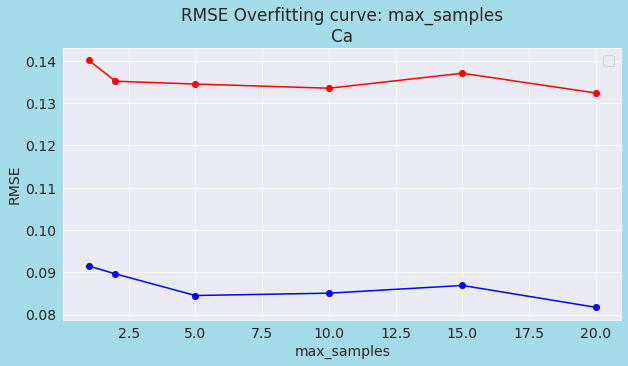

<Figure size 432x288 with 0 Axes>

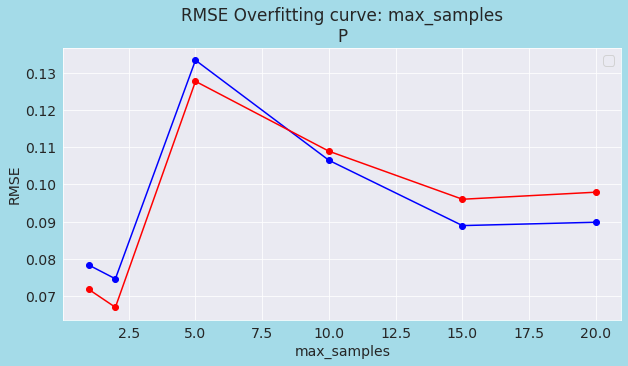

<Figure size 432x288 with 0 Axes>

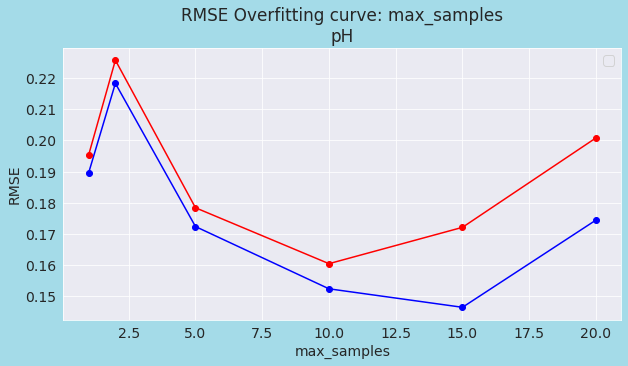

<Figure size 432x288 with 0 Axes>

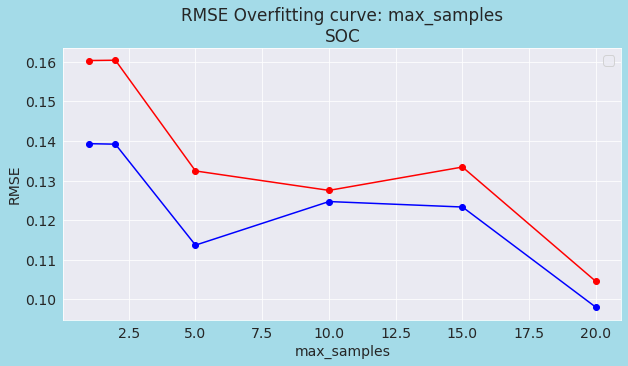

<Figure size 432x288 with 0 Axes>

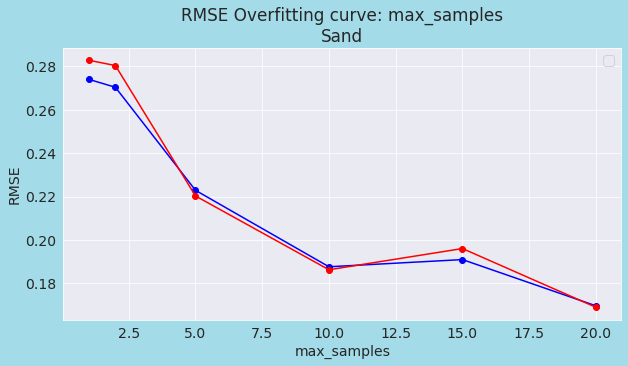

In [56]:
model = RandomForestRegressor
p_name = 'max_samples'
p_values = [None,1,2,5,10,15,20]
single_param_plot(model, p_name, p_values)

In [57]:
param_fit = np.mean([10, 15, 10, 10, 10])
print(p_name, '\nvalues: ', p_values, '\naverage: ', param_fit)

max_samples 
values:  [None, 1, 2, 5, 10, 15, 20] 
average:  11.0


In [58]:
jovian.log_metrics({'model2' : 'RandomForestRegressor', 
                    'random_state' : 0,
                    'n_jobs' : -1,
                    'n_estimators' : 500,
                    'max_depth' : {20 : [5,10,15,20,25,30,35]},
                    'min_samples_split' : {0.27 : [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]},
                    'min_samples_leaf' : {0.40 : [0.1, 0.13, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]},
                    'min_weight_fraction_leaf' : {0.36 : [0.1, 0.13, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]},
                    'max_features' : {4.2 : [1,2,3,4,5,6,7]},
                    'max_leaf_nodes' : {4.8 : [None, 2,3,4,5,6,7,8]},
                    'min_impurity_decrease' : {0.20 :[0.0, 0.1, 0.2, 0.3, 0.4]},
                    'ccp_alpha' : {0.20 : [0.0, 0.1, 0.2, 0.3, 0.4]},
                    'max_samples' : {11 : [None,1,2,5,10,15,20]}
                   })


[jovian] Metrics logged.


### Run the model with the tuned hyperparameters or better

In [59]:
model = RandomForestRegressor
init_params = {'random_state' : 0, 'n_jobs' : -1, 'n_estimators' : 500}

In [60]:
%%time
run_model(model, init_params, max_features=5)

Target Column: Ca
Train RMSE: 0.018611259120973677, 
Validation RMSE: 0.072846728369734, 
Train Score: 0.958330722096927, 
Validation Score: 0.7200901900982999

Target Column: P
Train RMSE: 0.0256978475301135, 
Validation RMSE: 0.06215952263313849, 
Train Score: 0.8811181755415692, 
Validation Score: 0.13796357408879711

Target Column: pH
Train RMSE: 0.03677879215395241, 
Validation RMSE: 0.10762567755671944, 
Train Score: 0.9534284320403519, 
Validation Score: 0.6499508920610992

Target Column: SOC
Train RMSE: 0.02448021132233304, 
Validation RMSE: 0.0704294469532712, 
Train Score: 0.9644101514455149, 
Validation Score: 0.7734786628838275

Target Column: Sand
Train RMSE: 0.04813398835460827, 
Validation RMSE: 0.12400630422436164, 
Train Score: 0.9666463966192468, 
Validation Score: 0.7786897140237817

Model: RandomForestRegressor
Parameter(s):  {'max_features': 5, 'random_state': 0, 'n_jobs': -1, 'n_estimators': 500}

                   Ca         P        pH       SOC      Sand      

### Predictions for DecisionTreeRegressor

In [61]:
submission_df

PIDN        Ca         P        pH       SOC      Sand
0    09gt9UK5  0.034440  0.039215  0.359316  0.058896  0.544868
1    0BVvxJ6a  0.067162  0.077024  0.471365  0.113937  0.329278
2    0KbdgApg  0.078075  0.030974  0.424628  0.112371  0.276878
3    0MnuuduB  0.149744  0.192753  0.387323  0.389760  0.096159
4    0PcIsF9z  0.039325  0.040314  0.299732  0.151143  0.524010
5    0ShTFLYJ  0.061116  0.020046  0.331333  0.050818  0.486065
6    0XZh9jka  0.141393  0.156100  0.340261  0.353749  0.139825
7    0Y7Wegri  0.036870  0.055588  0.431072  0.069021  0.548224
8    0dTqplIM  0.140825  0.172442  0.417330  0.252127  0.158809
9    0lNiZicC  0.029240  0.026352  0.302307  0.064448  0.319000
10   0rGeJ0QN  0.051960  0.125363  0.405129  0.075598  0.538972
11   0sXI9ytQ  0.008773  0.040839  0.283594  0.017347  0.843488
12   0ukt4aP6  0.114762  0.073593  0.494109  0.130002  0.259697
13   1AGspb8f  0.043259  0.069408  0.314917  0.193091  0.323839
14   1Csy0gvE  0.027283  0.074938  0.354885  0.037766  0.710350
15   1Ic2hly1  0.088244  0.180664  0.352935  0.095921  0.528474
16   1PPbaTwt  0.046251  0.044049  0.410451  0.071362  0.401417
17   1SO5VJNy  0.032992  0.088431  0.378321  0.054241  0.681504
18   1arHxK3Y  0.161147  0.152131  0.455524  0.226653  0.209484
19   1fCW4Bba  0.083582  0.102514  0.411206  0.111242  0.499549
20   1qDZNvIm  0.015609  0.088250  0.326279  0.029377  0.768238
21   28LYJC2V  0.104004  0.077917  0.321340  0.247460  0.317583
22   2CzACvQq  0.135649  0.158589  0.576067  0.153231  0.295846
23   2FT3crfv  0.124028  0.136613  0.384131  0.259054  0.181161
24   2Fy2uHVg  0.029674  0.023903  0.319616  0.072542  0.302856
25   2MkMEApm  0.040237  0.130386  0.384131  0.060842  0.657738
26   2NDGWEOe  0.161864  0.108382  0.534977  0.179795  0.234756
27   2NyyCiqn  0.049436  0.086441  0.357446  0.062013  0.658799
28   2QRzIb84  0.098994  0.101522  0.485150  0.117110  0.429695
29   2QcbdrUZ  0.097161  0.041448  0.336885  0.094262  0.618496
30   2YgAimWK  0.030338  0.115957  0.420289  0.059606  0.576606
31   2cx85d9H  0.094240  0.018885  0.459104  0.114780  0.255661
32   2homMXMV  0.030516  0.072519  0.311580  0.091410  0.588354
33   2ldLrUtq  0.040245  0.025910  0.343136  0.116103  0.313372
34   2nsACW6G  0.102071  0.042266  0.249591  0.342713  0.213205
35   2yMbVnWc  0.112752  0.173549  0.372388  0.250376  0.455108
36   36r8sgGQ  0.026896  0.068802  0.382190  0.040361  0.689211
37   3NXAXCl3  0.055836  0.024968  0.237090  0.237657  0.175819
38   3QG0z6fl  0.032340  0.022391  0.369023  0.074142  0.386805
39   3WS8R9qm  0.141137  0.083211  0.348310  0.346109  0.165819
40   3fRLm8f5  0.037440  0.054357  0.322007  0.118476  0.546124
41   3mZhp1nQ  0.034091  0.061326  0.382402  0.062912  0.516923
42   3pikJXRL  0.019746  0.020130  0.196325  0.171228  0.175555
43   3pxOEGHL  0.027062  0.076043  0.336536  0.058990  0.647963
44   3ttdV3f5  0.222373  0.026484  0.421933  0.131014  0.577183
45   3v4X6Mfe  0.152965  0.066806  0.623845  0.102372  0.252890
46   3wORuPiv  0.118534  0.090846  0.333686  0.234861  0.105642
47   43EfrxZj  0.096347  0.088585  0.373118  0.241137  0.127738
48   457Vwm21  0.064537  0.048661  0.425337  0.111324  0.406951
49   46KNnOdx  0.027349  0.056135  0.277517  0.112940  0.518022
50   47TwNsVC  0.101053  0.044435  0.280392  0.338383  0.144646
51   49856RpO  0.039536  0.020924  0.300018  0.119239  0.333608
52   4Ane1o2N  0.024773  0.052667  0.352818  0.054970  0.584256
53   4AyVUgSc  0.063961  0.023612  0.342709  0.062750  0.340752
54   4B1951On  0.094626  0.020896  0.409143  0.136278  0.317579
55   4OL39Teo  0.119564  0.112471  0.399690  0.202627  0.220014
56   4eQ90eLY  0.116380  0.123683  0.366476  0.307666  0.113039
57   4o5jwMj8  0.040154  0.052089  0.347686  0.076953  0.544612
58   4vPgpl2c  0.048401  0.047541  0.399513  0.071720  0.518730
59   51r9aA0d  0.092599  0.024027  0.331651  0.083676  0.395569
60   58SmeRoP  0.103833  0.076699  0.369877  0.201062  0.379669
61   5HJp1AXn  0.108668  0.096218  0.3469

### kaggle submission

In [62]:
sample_df.head()

PIDN  Ca  P  pH  SOC  Sand
0  09gt9UK5   0  0   0    0     0
1  0BVvxJ6a   0  0   0    0     0
2  0KbdgApg   0  0   0    0     0
3  0MnuuduB   0  0   0    0     0
4  0PcIsF9z   0  0   0    0     0

In [63]:
submission_df.to_csv('submission.csv', index=False)

In [64]:
from IPython.display import FileLink
FileLink('submission.csv')

/home/jovyan/submission.csv

Submission link : https://www.kaggle.com/c/afsis-soil-properties/submit

## Model: RandomForestRegressor
### 9th overall submission
-Parameter(s):  {'max_features': 5, 'random_state': 0, 'n_jobs': -1, 'n_estimators': 500}

![](https://i.imgur.com/UduOOAd.png)


# Model 3 
## Extreme Gradient Boosting Regressor

In [65]:
!pip install xgboost --quiet

In [66]:
!pip list | grep xgboost

xgboost                           1.4.2


In [67]:
from xgboost import XGBRegressor

**Extreme Gradient Boosting Regressor Model Parameters:**
- n_estimators, int
- max_depth, int
- learning_rate, float
- verbosity, int;  0 (silent) - 3 (debug)
- tree_method, str; default=auto
- booster, str; [gbtree, gblinear, dart]
- n_jobs, int
- random_state, int, RandomState instance or None, default=None
- gamma, float
- min_child_weight, float
- max_delta_step, float
- subsample, float
- colsample_bytree /colsample_bylevel/ colsample_bynode, float
- reg_alpha/ reg_lambda, float
- base_score, float
- random_state, int

[XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)

In [68]:
?XGBRegressor

In [69]:
model = XGBRegressor
init_params = {'random_state' : 42, 'n_jobs' : -1, 'n_estimators' : 5}

<Figure size 432x288 with 0 Axes>

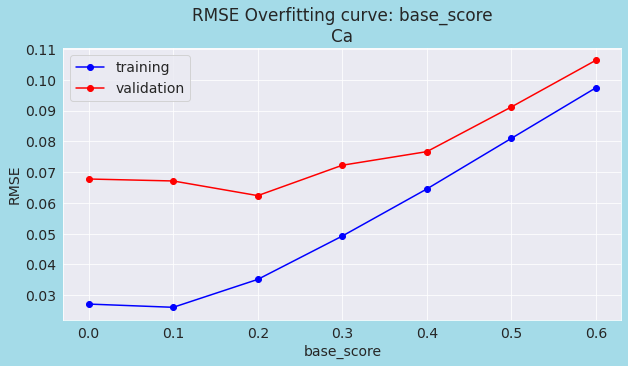

<Figure size 432x288 with 0 Axes>

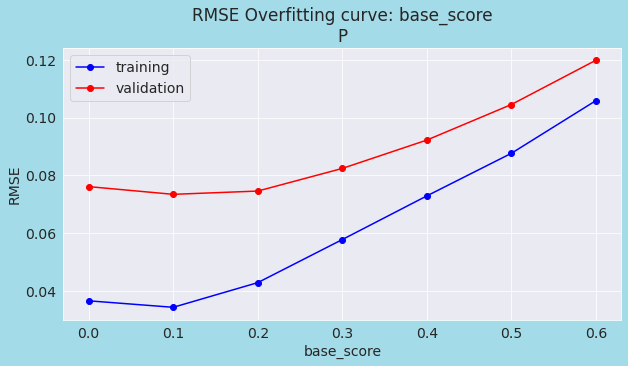

<Figure size 432x288 with 0 Axes>

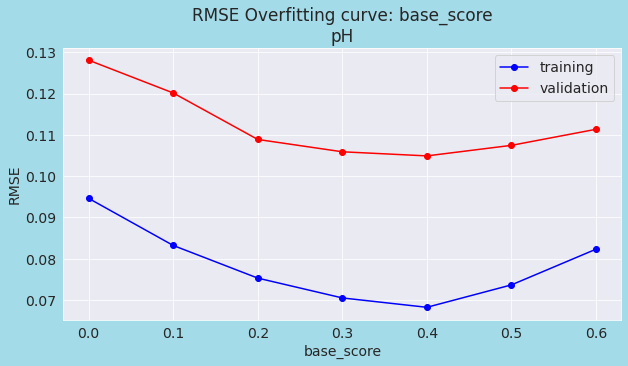

<Figure size 432x288 with 0 Axes>

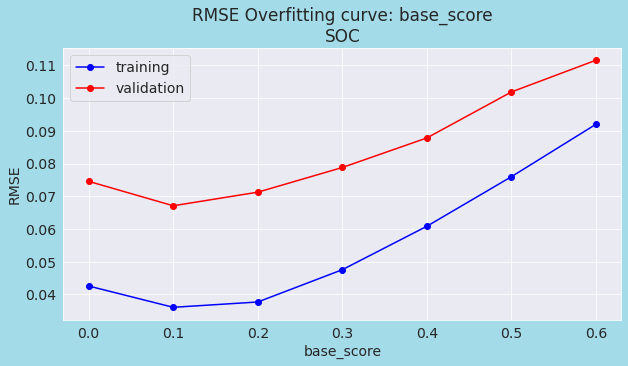

<Figure size 432x288 with 0 Axes>

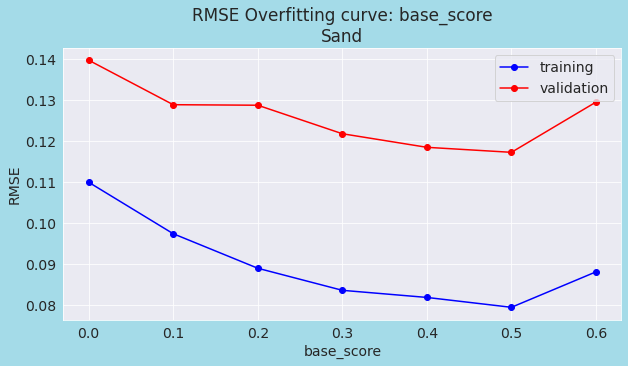

In [70]:
for t_col in target_columns:
    target = t_col
    plot_param_values('base_score', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], init_params)

In [71]:
param_fit = np.mean([0.2, 0.2, 0.4, 0.2, 0.3])
param_fit

0.26

In [72]:
jovian.log_metrics({'model3' : 'RandomForestRegressor', 
                    'random_state' : 0,
                    'n_jobs' : -1,
                    'n_estimators' : 900,
                    'max_depth' : { 15 : [5,10,15,20,25,30,35]},
                    'learning_rate' : {0.3 : [0.1, 0.2, 0.3, 0.4, 0.5]},
                    'gamma' : { 0.38 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'max_delta_step' : { 0.4 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'subsample' : { 0.279 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'colsample_bytree' : { 0.3 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'colsample_bylevel' : { 0.36 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'colsample_bynode' : { 0.38 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'reg_alpha' : { 0.439 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'reg_lambda' : { 0.259 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                    'base_score' : { 0.26 : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
                   })

[jovian] Metrics logged.


### `to delete all rows in  param_results_df:`

param_results_df = param_results_df[0:0]

### `to delete last row`
df = df.iloc[:-1 , :]

In [73]:
param_results_df = param_results_df[0:0]
param_results_df

Empty DataFrame
Columns: [model_name, avg_train_score, avg_val_score, avg_difference, sum_of_differences, params]
Index: []

In [74]:
model = XGBRegressor
init_params = {'random_state' : 42, 'n_jobs' : -1, 'n_estimators' : 900}

Target Column: Ca
Train RMSE: 0.0006549131866509756, 
Validation RMSE: 0.04437322416176477, 
Train Score: 0.9999484021111029, 
Validation Score: 0.8961419923709082

Target Column: P
Train RMSE: 0.0007455710444965861, 
Validation RMSE: 0.06767688416524327, 
Train Score: 0.9998999308912878, 
Validation Score: -0.021859031629931636

Target Column: pH
Train RMSE: 0.0007472112462127993, 
Validation RMSE: 0.08393435394910358, 
Train Score: 0.9999807773731981, 
Validation Score: 0.7870994996780212

Target Column: SOC
Train RMSE: 0.0007233658829008731, 
Validation RMSE: 0.05829806132580902, 
Train Score: 0.9999689249484076, 
Validation Score: 0.8447939001284563

Target Column: Sand
Train RMSE: 0.000786199727303737, 
Validation RMSE: 0.09759525349290249, 
Train Score: 0.9999911017451356, 
Validation Score: 0.8629208308291834

Model: XGBRegressor
Parameter(s):  {'learning_rate': 0.05, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

                   Ca         P        pH       SOC     

CPU times: user 1h 2min 12s, sys: 3.53 s, total: 1h 2min 15s
Wall time: 35min 10s


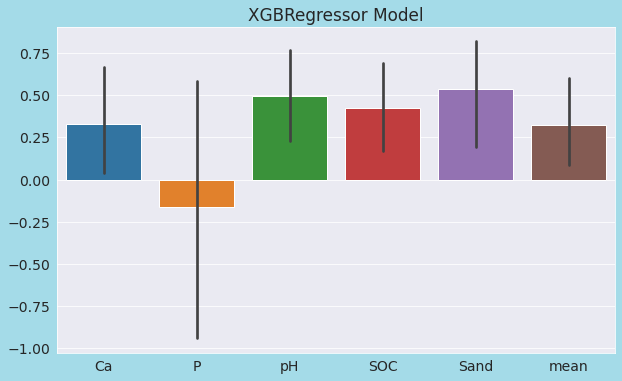

In [103]:
%%time
run_model(model, init_params, learning_rate=0.05)

In [104]:
param_results_df

model_name  avg_train_score  avg_val_score  avg_difference  \
0  XGBRegressor         0.976490       0.633807        0.343159   
1  XGBRegressor         0.996059       0.641669        0.354470   
2  XGBRegressor         0.999333       0.647196        0.352150   
3  XGBRegressor         0.999866       0.654562        0.345306   
4  XGBRegressor         0.999947       0.673789        0.326158   
5  XGBRegressor         0.999956       0.673814        0.326142   

   sum_of_differences  \
0            2.117304   
1            2.138132   
2            2.110577   
3            2.064993   
4            1.937801   
5            1.956834   

                                                                             params  
0          {'max_depth': 15, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}  
1  {'colsample_bynode': 0.5, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}  
2          {'max_depth': 20, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}  
3     {'learning_rate': 0.3, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}  
4     {'learning_rate': 0.1, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}  
5    {'learning_rate': 0.05, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

### run the parameters with best results and submit

Target Column: Ca
Train RMSE: 0.0006292343614934179, 
Validation RMSE: 0.04629351117236462, 
Train Score: 0.9999523690411315, 
Validation Score: 0.8869584097397518

Target Column: P
Train RMSE: 0.0006965208455618608, 
Validation RMSE: 0.06368378651807839, 
Train Score: 0.9999126646223427, 
Validation Score: 0.09516783154058883

Target Column: pH
Train RMSE: 0.0007462531038242322, 
Validation RMSE: 0.08733292899604192, 
Train Score: 0.9999808266396004, 
Validation Score: 0.7695093939256366

Target Column: SOC
Train RMSE: 0.0006810463937412351, 
Validation RMSE: 0.05968532538419502, 
Train Score: 0.9999724545919542, 
Validation Score: 0.8373194275432223

Target Column: Sand
Train RMSE: 0.0007212349604556552, 
Validation RMSE: 0.09964248566977654, 
Train Score: 0.9999925115384665, 
Validation Score: 0.8571095590704185

Model: XGBRegressor
Parameter(s):  {'base_score': 0.26, 'colsample_bynode': 0.4, 'learning_rate': 0.1, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

             

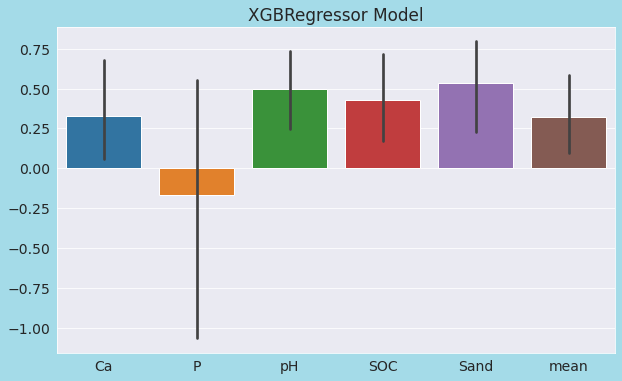

In [136]:
%%time
run_model(model, init_params, base_score = 0.26, colsample_bynode = 0.40, learning_rate = 0.1)

### Predictions for XGBRegressor

In [137]:
XGBRegressor_submission_df = submission_df

In [138]:
XGBRegressor_submission_df

PIDN        Ca         P        pH       SOC      Sand
0    09gt9UK5  0.021574  0.017596  0.268136  0.042233  0.602343
1    0BVvxJ6a  0.112970  0.294688  0.428916  0.221566  0.160904
2    0KbdgApg  0.073374  0.078340  0.424763  0.130704  0.252932
3    0MnuuduB  0.146640  0.144845  0.435155  0.510959  0.098073
4    0PcIsF9z  0.008628  0.035048  0.254977  0.123896  0.559750
5    0ShTFLYJ  0.145807  0.028716  0.305771  0.026287  0.426507
6    0XZh9jka  0.170264  0.100808  0.220685  0.485114  0.176253
7    0Y7Wegri  0.031693  0.075437  0.479946  0.100793  0.370145
8    0dTqplIM  0.202257  0.040627  0.458355  0.152378  0.209146
9    0lNiZicC  0.029222  0.003065  0.365158  0.048063  0.261684
10   0rGeJ0QN  0.026536  0.052636  0.408483  0.125277  0.474921
11   0sXI9ytQ  0.034472  0.037594  0.361769  0.039974  0.747917
12   0ukt4aP6  0.097234  0.082977  0.626306  0.107630  0.260510
13   1AGspb8f  0.049843  0.017037  0.244690  0.127685  0.232298
14   1Csy0gvE  0.018161  0.025111  0.320420  0.023571  0.687516
15   1Ic2hly1  0.120082  0.103986  0.376797  0.130473  0.501548
16   1PPbaTwt  0.034764  0.044738  0.311112  0.043811  0.382474
17   1SO5VJNy  0.063330  0.031441  0.392246  0.042647  0.634307
18   1arHxK3Y  0.159891  0.112951  0.546070  0.180515  0.293881
19   1fCW4Bba  0.041015  0.047544  0.486064  0.129160  0.466260
20   1qDZNvIm  0.016320  0.020826  0.409366  0.019665  0.657792
21   28LYJC2V  0.081523  0.061811  0.276227  0.154045  0.302923
22   2CzACvQq  0.119296  0.222579  0.616912  0.373140  0.217211
23   2FT3crfv  0.183765  0.116227  0.388172  0.137145  0.264666
24   2Fy2uHVg  0.038586  0.081707  0.284970  0.084831  0.319997
25   2MkMEApm  0.062940  0.045211  0.470804  0.093685  0.694793
26   2NDGWEOe  0.147769  0.138580  0.636729  0.141784  0.290476
27   2NyyCiqn  0.061861  0.031979  0.397964  0.041925  0.678893
28   2QRzIb84  0.116207  0.106671  0.740881  0.101522  0.330051
29   2QcbdrUZ  0.040458  0.140601  0.383657  0.128897  0.388143
30   2YgAimWK  0.036841  0.047604  0.454007  0.075805  0.549174
31   2cx85d9H  0.097991  0.045122  0.430197  0.117734  0.234002
32   2homMXMV  0.019174  0.065969  0.287401  0.118773  0.546508
33   2ldLrUtq  0.022876  0.006500  0.334274  0.090042  0.229083
34   2nsACW6G  0.122354  0.107365  0.165099  0.385110  0.164050
35   2yMbVnWc  0.160559  0.182283  0.337716  0.271480  0.419360
36   36r8sgGQ  0.012868  0.020563  0.387598  0.013534  0.609859
37   3NXAXCl3  0.019739  0.030980  0.142343  0.202626  0.139317
38   3QG0z6fl  0.020767  0.028871  0.357202  0.058725  0.455486
39   3WS8R9qm  0.196488  0.328891  0.204699  0.487268  0.168246
40   3fRLm8f5  0.014434  0.035815  0.267361  0.130766  0.630334
41   3mZhp1nQ  0.030857  0.113869  0.386017  0.080123  0.440561
42   3pikJXRL  0.020569  0.038672  0.139027  0.204003  0.120346
43   3pxOEGHL  0.053186  0.020025  0.340717  0.016626  0.626369
44   3ttdV3f5  0.133042  0.201668  0.429156  0.225083  0.232220
45   3v4X6Mfe  0.127452  0.041325  0.657232  0.087347  0.231620
46   3wORuPiv  0.087320  0.046177  0.275468  0.144504  0.109574
47   43EfrxZj  0.086633  0.034311  0.413203  0.201449  0.205620
48   457Vwm21  0.074194  0.111766  0.451438  0.140951  0.312872
49   46KNnOdx  0.004074  0.055514  0.273916  0.092966  0.516014
50   47TwNsVC  0.027504  0.272170  0.153523  0.299060  0.130003
51   49856RpO  0.014539  0.027652  0.216143  0.136853  0.292513
52   4Ane1o2N  0.014384  0.018893  0.377928  0.046795  0.658686
53   4AyVUgSc  0.152273  0.034480  0.315548  0.049383  0.407033
54   4B1951On  0.040936  0.013430  0.383997  0.128325  0.285475
55   4OL39Teo  0.134693  0.059517  0.406524  0.186032  0.252156
56   4eQ90eLY  0.159719  0.074799  0.373864  0.283158  0.126239
57   4o5jwMj8  0.019431  0.037558  0.329729  0.041482  0.556963
58   4vPgpl2c  0.025163  0.027883  0.320879  0.025893  0.494189
59   51r9aA0d  0.156836  0.007317  0.292927  0.047000  0.393701
60   58SmeRoP  0.182674  0.054632  0.340553  0.111987  0.348521
61   5HJp1AXn  0.111128  0.054898  0.2893

### kaggle submission

In [139]:
sample_df.head()

PIDN  Ca  P  pH  SOC  Sand
0  09gt9UK5   0  0   0    0     0
1  0BVvxJ6a   0  0   0    0     0
2  0KbdgApg   0  0   0    0     0
3  0MnuuduB   0  0   0    0     0
4  0PcIsF9z   0  0   0    0     0

In [140]:
submission_df

PIDN        Ca         P        pH       SOC      Sand
0    09gt9UK5  0.021574  0.017596  0.268136  0.042233  0.602343
1    0BVvxJ6a  0.112970  0.294688  0.428916  0.221566  0.160904
2    0KbdgApg  0.073374  0.078340  0.424763  0.130704  0.252932
3    0MnuuduB  0.146640  0.144845  0.435155  0.510959  0.098073
4    0PcIsF9z  0.008628  0.035048  0.254977  0.123896  0.559750
5    0ShTFLYJ  0.145807  0.028716  0.305771  0.026287  0.426507
6    0XZh9jka  0.170264  0.100808  0.220685  0.485114  0.176253
7    0Y7Wegri  0.031693  0.075437  0.479946  0.100793  0.370145
8    0dTqplIM  0.202257  0.040627  0.458355  0.152378  0.209146
9    0lNiZicC  0.029222  0.003065  0.365158  0.048063  0.261684
10   0rGeJ0QN  0.026536  0.052636  0.408483  0.125277  0.474921
11   0sXI9ytQ  0.034472  0.037594  0.361769  0.039974  0.747917
12   0ukt4aP6  0.097234  0.082977  0.626306  0.107630  0.260510
13   1AGspb8f  0.049843  0.017037  0.244690  0.127685  0.232298
14   1Csy0gvE  0.018161  0.025111  0.320420  0.023571  0.687516
15   1Ic2hly1  0.120082  0.103986  0.376797  0.130473  0.501548
16   1PPbaTwt  0.034764  0.044738  0.311112  0.043811  0.382474
17   1SO5VJNy  0.063330  0.031441  0.392246  0.042647  0.634307
18   1arHxK3Y  0.159891  0.112951  0.546070  0.180515  0.293881
19   1fCW4Bba  0.041015  0.047544  0.486064  0.129160  0.466260
20   1qDZNvIm  0.016320  0.020826  0.409366  0.019665  0.657792
21   28LYJC2V  0.081523  0.061811  0.276227  0.154045  0.302923
22   2CzACvQq  0.119296  0.222579  0.616912  0.373140  0.217211
23   2FT3crfv  0.183765  0.116227  0.388172  0.137145  0.264666
24   2Fy2uHVg  0.038586  0.081707  0.284970  0.084831  0.319997
25   2MkMEApm  0.062940  0.045211  0.470804  0.093685  0.694793
26   2NDGWEOe  0.147769  0.138580  0.636729  0.141784  0.290476
27   2NyyCiqn  0.061861  0.031979  0.397964  0.041925  0.678893
28   2QRzIb84  0.116207  0.106671  0.740881  0.101522  0.330051
29   2QcbdrUZ  0.040458  0.140601  0.383657  0.128897  0.388143
30   2YgAimWK  0.036841  0.047604  0.454007  0.075805  0.549174
31   2cx85d9H  0.097991  0.045122  0.430197  0.117734  0.234002
32   2homMXMV  0.019174  0.065969  0.287401  0.118773  0.546508
33   2ldLrUtq  0.022876  0.006500  0.334274  0.090042  0.229083
34   2nsACW6G  0.122354  0.107365  0.165099  0.385110  0.164050
35   2yMbVnWc  0.160559  0.182283  0.337716  0.271480  0.419360
36   36r8sgGQ  0.012868  0.020563  0.387598  0.013534  0.609859
37   3NXAXCl3  0.019739  0.030980  0.142343  0.202626  0.139317
38   3QG0z6fl  0.020767  0.028871  0.357202  0.058725  0.455486
39   3WS8R9qm  0.196488  0.328891  0.204699  0.487268  0.168246
40   3fRLm8f5  0.014434  0.035815  0.267361  0.130766  0.630334
41   3mZhp1nQ  0.030857  0.113869  0.386017  0.080123  0.440561
42   3pikJXRL  0.020569  0.038672  0.139027  0.204003  0.120346
43   3pxOEGHL  0.053186  0.020025  0.340717  0.016626  0.626369
44   3ttdV3f5  0.133042  0.201668  0.429156  0.225083  0.232220
45   3v4X6Mfe  0.127452  0.041325  0.657232  0.087347  0.231620
46   3wORuPiv  0.087320  0.046177  0.275468  0.144504  0.109574
47   43EfrxZj  0.086633  0.034311  0.413203  0.201449  0.205620
48   457Vwm21  0.074194  0.111766  0.451438  0.140951  0.312872
49   46KNnOdx  0.004074  0.055514  0.273916  0.092966  0.516014
50   47TwNsVC  0.027504  0.272170  0.153523  0.299060  0.130003
51   49856RpO  0.014539  0.027652  0.216143  0.136853  0.292513
52   4Ane1o2N  0.014384  0.018893  0.377928  0.046795  0.658686
53   4AyVUgSc  0.152273  0.034480  0.315548  0.049383  0.407033
54   4B1951On  0.040936  0.013430  0.383997  0.128325  0.285475
55   4OL39Teo  0.134693  0.059517  0.406524  0.186032  0.252156
56   4eQ90eLY  0.159719  0.074799  0.373864  0.283158  0.126239
57   4o5jwMj8  0.019431  0.037558  0.329729  0.041482  0.556963
58   4vPgpl2c  0.025163  0.027883  0.320879  0.025893  0.494189
59   51r9aA0d  0.156836  0.007317  0.292927  0.047000  0.393701
60   58SmeRoP  0.182674  0.054632  0.340553  0.111987  0.348521
61   5HJp1AXn  0.111128  0.054898  0.2893

In [141]:
submission_df.to_csv('submission.csv', index=False)

In [142]:
from IPython.display import FileLink
FileLink('submission.csv')

/home/jovyan/submission.csv

Submission link : https://www.kaggle.com/c/afsis-soil-properties/submit

## Model: XGBRegressor
### 11th overall submission
- Parameter(s):  {'colsample_bynode': 0.4, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 500}

![](https://i.imgur.com/uw9Gwak.png)


***
10th:
- Score: 0.97759
- Parameter(s):  {'colsample_bytree': 1, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 500}


13th:
- Score: 0.98856
- Parameter(s):  {'reg_alpha': 0.439, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 500}


14th:
- Score: 0.97831
- Parameter(s):  {'colsample_bynode': 0.36, 'learning_rate': 0.1, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

15th:
- Score: 0.98846
- Parameter(s):  {'base_score': 0.2, 'colsample_bynode': 0.4, 'learning_rate': 0.3, 'gamma': 0.38, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

16th:
- Score: 0.98196
- Parameter(s):  {'base_score': 0.26, 'colsample_bynode': 0.3, 'learning_rate': 0.1, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

17th:
- Score : 0.97920
- Parameter(s):  {'base_score': 0.26, 'colsample_bynode': 0.4, 'learning_rate': 0.1, 'random_state': 42, 'n_jobs': -1, 'n_estimators': 900}

In [143]:
print('param_results_df:\n', param_results_df)
param_results_data = param_results_df.to_csv('param_results_csv', index= True)
print('\nparam_results:\n', param_results_data)

param_results_df:
      model_name  avg_train_score  avg_val_score  avg_difference  \
0  XGBRegressor         0.992719       0.670577        0.322142   
1  XGBRegressor         0.998755       0.654203        0.344552   
2  XGBRegressor         0.999761       0.648278        0.351483   
3  XGBRegressor         0.999929       0.682390        0.317538   
4  XGBRegressor         0.999962       0.675953        0.324009   
5  XGBRegressor         0.999958       0.664941        0.335017   
6  XGBRegressor         0.999965       0.662591        0.337374   
7  XGBRegressor         0.999964       0.676113        0.323851   
8  XGBRegressor         0.999962       0.687030        0.312933   

   sum_of_differences  \
0            1.900338   
1            2.089720   
2            2.115830   
3            1.871284   
4            1.929738   
5            2.021109   
6            2.026602   
7            1.929580   
8            1.866679   

                                                           


***
### Save Trained Models using joblib

In [144]:
import joblib

In [145]:
african_soil = {
    'model': DecisionTreeRegressor,
    'scaler': MinMaxScaler,
    'input_cols': train_df.columns,
    'target_cols': target_columns,
}

african_soil2 = {
    'model': RandomForestRegressor,
    'scaler': MinMaxScaler,
    'input_cols': train_df.columns,
    'target_cols': target_columns,
}

african_soil3 = {
    'model': XGBRegressor,
    'scaler': MinMaxScaler,
    'input_cols': train_df.columns,
    'target_cols': target_columns,
}

In [146]:
joblib.dump(african_soil, 'african_soil.joblib')
joblib.dump(african_soil2, 'african_soil2.joblib')
joblib.dump(african_soil3, 'african_soil3.joblib')

['african_soil3.joblib']

load back using joblib.load

In [147]:
african_soil_load = joblib.load('african_soil.joblib')
african_soil_load2 = joblib.load('african_soil2.joblib')
african_soil_load3 = joblib.load('african_soil3.joblib')

### References
***
- [kaggle dataset](https://www.kaggle.com/c/afsis-soil-properties/data)
- [Markdown Guide](https://www.markdownguide.org/basic-syntax/)
- [image](https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/preparing_soil_for_planting-thinkstock_0.jpg?itok=bnuhazgM)
- [sample code](https://www.kaggle.com/chachiawacef/africa-soil-property-prediction-0-6-mse)
- [sample_code - scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html#sphx-glr-auto-examples-ensemble-plot-random-forest-regression-multioutput-py)
- [sample code-jovian](https://jovian.ai/aakashns/python-random-forests-assignment)
- [matplotlib](https://matplotlib.org)
- [askpython - dictionaries](https://askpython.com)
- [sounds](https://www.pacdv.com/sounds/index.html)


In [ ]:
jovian.commit()

In [ ]:
jovian.submit(assignment="zerotogbms-project")